In [3]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
%matplotlib inline

---

- ## 영상 합성
    - #### dst(y, x) = image1(y, x) * alpha + image2(y, x) * beta
        - ##### alpha, beta: 가중치
    - #### np.clip(array, min, max)
        - ##### min보다 작은 값 min으로, max보다 큰 값 max로 변경
    - #### cv2.addWeighted(image1, alpha, image2, beta, gamma)
        - ##### image1 * alpha + image2 * beta + gamma

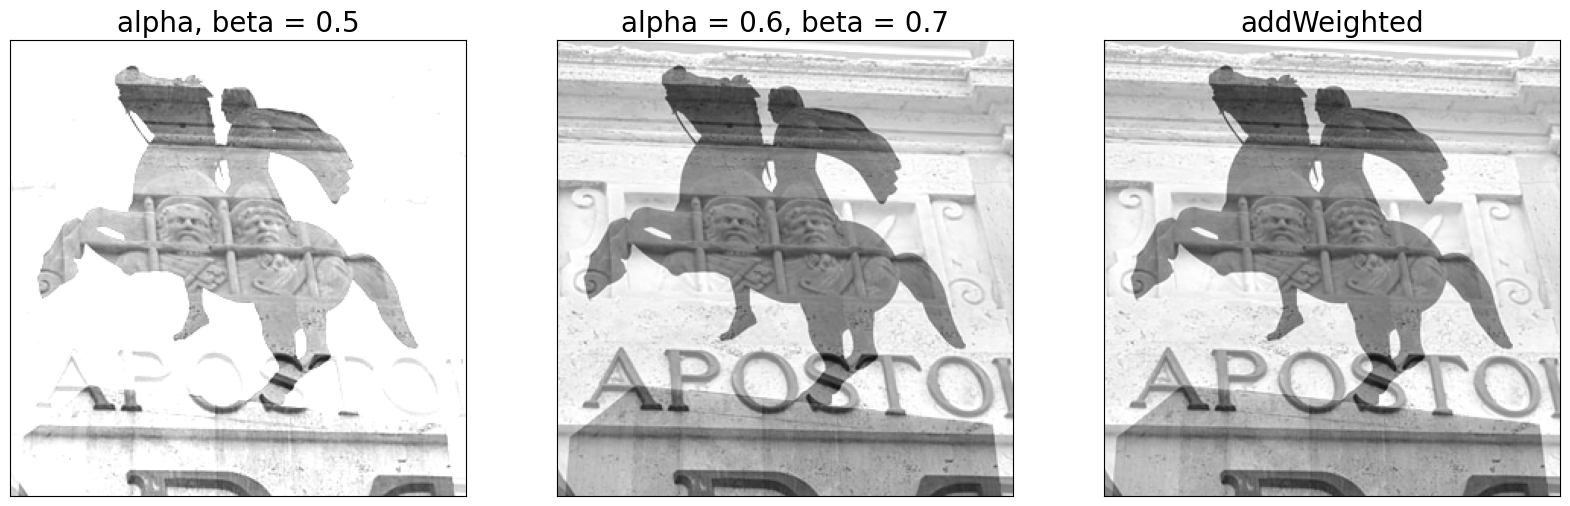

In [7]:
image1 = cv2.imread("./images/chap06/add1.jpg", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("./images/chap06/add2.jpg", cv2.IMREAD_GRAYSCALE)

alpha, beta = (0.6, 0.7)

# saturation 방식 더하기
add_img1 = cv2.add(image1, image2)

# modulo 방식 -> saturation
add_img2 = cv2.add(image1 * alpha, image2 * beta)
add_img2 = np.uint8(np.clip(add_img2, 0, 255))

add_img3 = cv2.addWeighted(image1, alpha, image2, beta, 0)

show_images({"alpha, beta = 0.5": add_img1, "alpha = 0.6, beta = 0.7": add_img2, "addWeighted": add_img3}, 20)

---

- ## 명암 대비
    - ### cv2.scaleAdd(src1, alpha, src2)
        - #### return = src1 * alpha + src2

- #### 대비 0.5로 감소된 이미지 구하기

image
[[26 12  4  2  4]
 [26 13  5  3  4]
 [31 16  6  3  4]
 [37 19  7  3  4]
 [34 18  7  4  5]]
image1
[[13  6  2  1  2]
 [13  6  2  2  2]
 [16  8  3  2  2]
 [18 10  4  2  2]
 [17  9  4  2  2]]
addWeighted
[[13  6  2  1  2]
 [13  6  2  2  2]
 [16  8  3  2  2]
 [18 10  4  2  2]
 [17  9  4  2  2]]


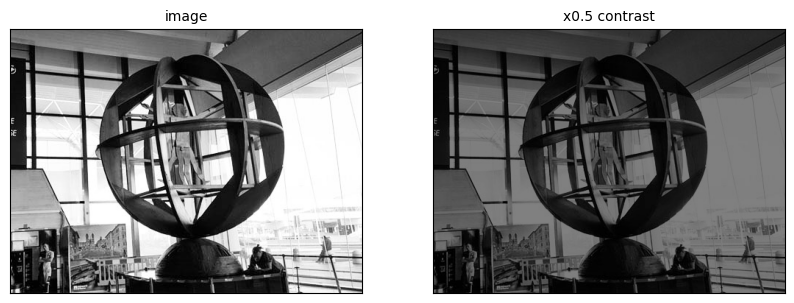

In [31]:
image = cv2.imread("./images/chap06/contrast.jpg", cv2.IMREAD_GRAYSCALE)
black_image = np.zeros(image.shape, dtype='uint8')

print("image")
print(image[25:30, 25:30])

image1 = cv2.scaleAdd(image, 0.5, black_image)
print("image1")
print(image1[25:30, 25:30])

print("addWeighted")
print(cv2.addWeighted(image, 0.5, black_image, 0, 0)[25:30, 25:30])

show_images({"image": image, "x0.5 contrast": image1}, 10)

- #### 대비 2.0으로 증가된 이미지 구하기

image
[[26 12  4  2  4]
 [26 13  5  3  4]
 [31 16  6  3  4]
 [37 19  7  3  4]
 [34 18  7  4  5]]
image2
[[52 24  8  4  8]
 [52 26 10  6  8]
 [62 32 12  6  8]
 [74 38 14  6  8]
 [68 36 14  8 10]]
addWeighted
[[52 24  8  4  8]
 [52 26 10  6  8]
 [62 32 12  6  8]
 [74 38 14  6  8]
 [68 36 14  8 10]]


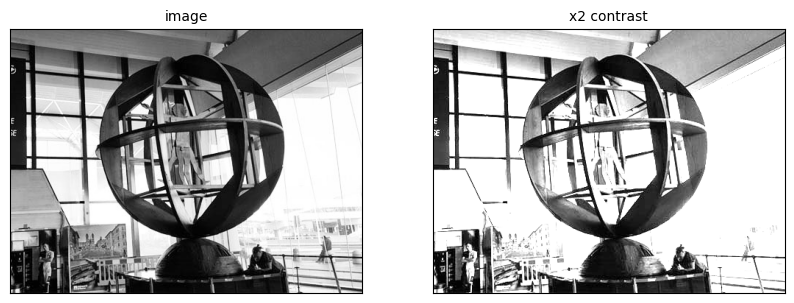

In [33]:
print("image")
print(image[25:30, 25:30])

image2 = cv2.scaleAdd(image, 2, black_image)
print("image2")
print(image2[25:30, 25:30])

print("addWeighted")
print(cv2.addWeighted(image, 2, black_image, 0, 0)[25:30, 25:30])

show_images({"image": image, "x2 contrast": image2}, 10)

- #### B채널의 평균값의 절반을 이용하여 대비 변경시 화질 개선
    - ##### 대비를 감소시킨 이미지에는 평균값 더함
    - ##### 대비를 증가시킨 이미지에는 평균값 뺌

  <br>
  
    - ##### 대비를 감소시킨 상태에서 픽셀값 더하면 뿌옇게 됨
    - ##### 대비를 증가시킨 상태에서 픽셀값 빼면 뚜렷해짐

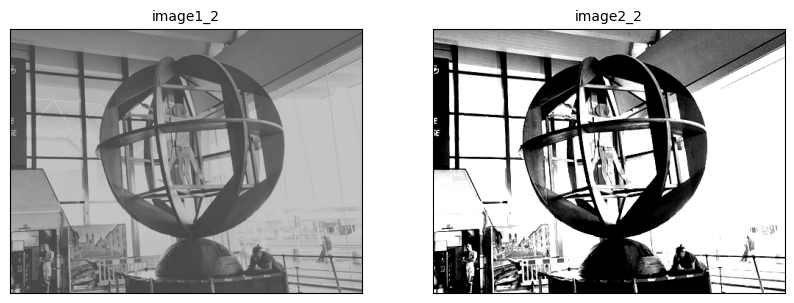

In [30]:
avg = cv2.mean(image)[0] / 2.0

image1_2 = cv2.addWeighted(image, 0.5, black_image, 0, avg)
image2_2 = cv2.addWeighted(image, 2, black_image, 0, -avg)

show_images({"image1_2": image1_2, "image2_2": image2_2}, 10)

---